In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
from sklearn import metrics
import cv2
import os
%matplotlib inline
sns.set()

In [2]:
#function to get images from directory
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for i in os.listdir(directory):
        if(i=='buildings'):
            label = 0
        elif(i=='forest'):
            label = 1
        elif(i=='glacier'):
            label = 2
        elif(i=='mountain'):
            label = 3
        elif(i=='sea'):
            label = 4
        elif(i=='street'):
            label = 5
            
        for ifile in os.listdir(directory+i):
            image = cv2.imread(directory+i+r'/'+ifile)
            
            image = cv2.resize(image,(150,150))
            
            Images.append(image)
            Labels.append(label)
            
    return shuffle(Images,Labels,random_state=42)


def get_label(code):
    labels = {0:'buildings',1:'forest',2:'glacier',3:'mountain',4:'sea',5:'street'}
    
    return labels[code]

In [3]:
Images, Labels = get_images('../Intel_Image_Classification/seg_train/seg_train/')

In [4]:
#converting to array
Images = np.array(Images)
Labels = np.array(Labels)

In [5]:
print('Image Shapes ' ,Images.shape)
print('Labels Shapes ' ,Labels.shape)

Image Shapes  (14034, 150, 150, 3)
Labels Shapes  (14034,)


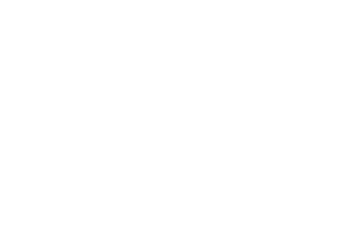

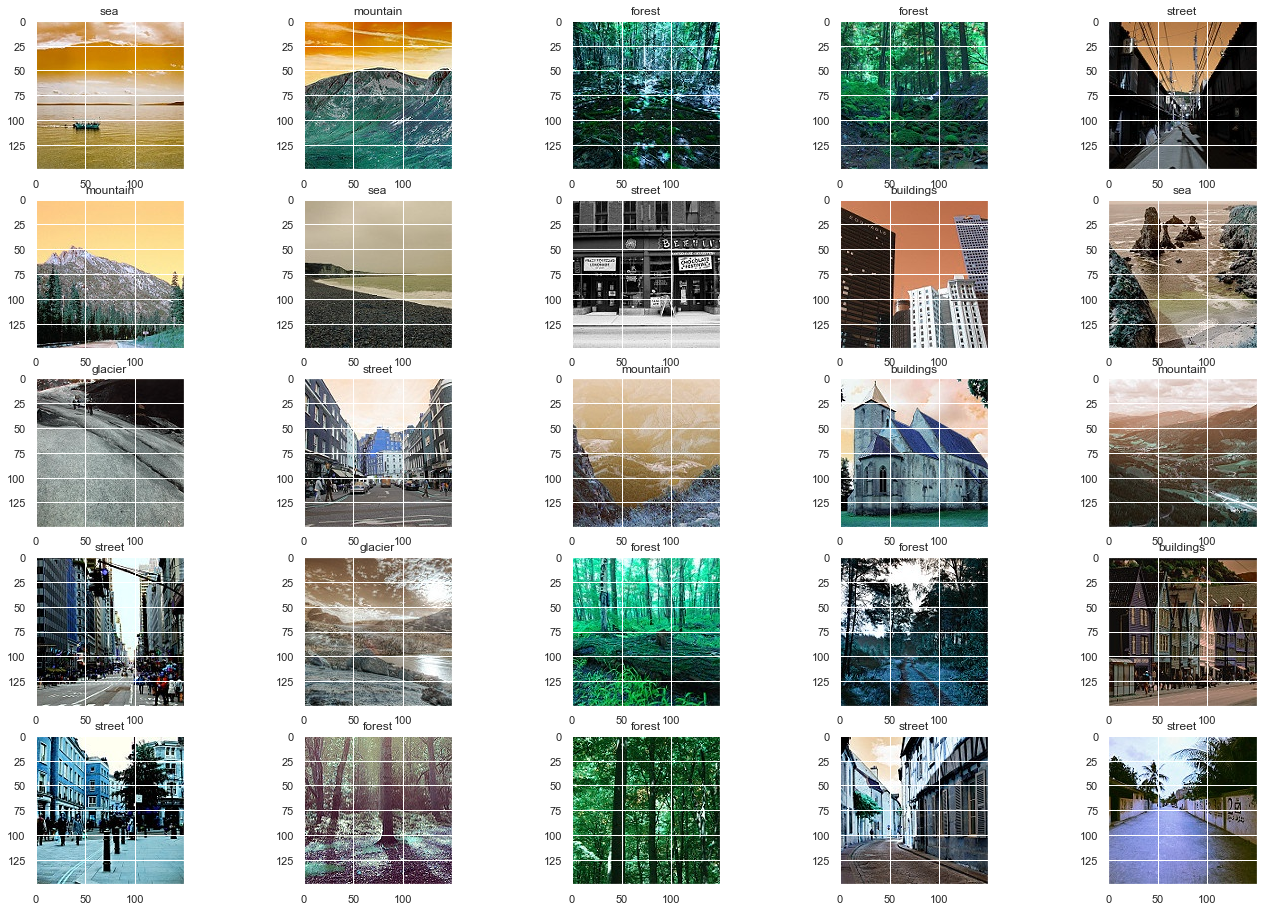

In [6]:
plt.axis('off')
f,ax = plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        random_number = np.random.randint(0,len(Images))
        ax[i,j] = ax[i,j].imshow(Images[random_number])
        ax[i,j] = ax[i,j].axes.set_title(get_label(Labels[random_number]))

In [7]:
Images

array([[[[250, 250, 250],
         [251, 251, 251],
         [250, 250, 250],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [255, 255, 255]],

        [[211, 211, 211],
         [213, 213, 213],
         [214, 214, 214],
         ...,
         [242, 242, 242],
         [242, 242, 242],
         [242, 242, 242]],

        [[225, 225, 225],
         [226, 226, 226],
         [227, 227, 227],
         ...,
         [240, 240, 240],
         [240, 240, 240],
         [239, 239, 239]],

        ...,

        [[139, 141, 142],
         [178, 180, 181],
         [115, 117, 118],
         ...,
         [135, 134, 136],
         [ 95,  92,  94],
         [ 81,  78,  80]],

        [[155, 157, 158],
         [159, 161, 162],
         [146, 148, 149],
         ...,
         [137, 139, 140],
         [110, 109, 111],
         [ 18,  17,  19]],

        [[ 83,  85,  86],
         [141, 143, 144],
         [212, 214, 215],
         ...,
         [ 75,  77,  78],
        

In [8]:
#normalizing the data
Images = Images/255

In [9]:
Images.shape

(14034, 150, 150, 3)

In [10]:
#defining the model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (150, 150, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),strides=(2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (5,5),strides=(2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(6, activation = "softmax"))

In [11]:
#optimization 
optimizer = RMSprop()

In [12]:
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [14]:
model.fit(Images,Labels,batch_size=80,epochs=20,callbacks=[learning_rate_reduction])

Train on 14034 samples
Epoch 1/20
14034/14034 [==============================] - 797s 57ms/sample - loss: 1.2743 - accuracy: 0.5058
Epoch 2/20
14034/14034 [==============================] - 676s 48ms/sample - loss: 0.9007 - accuracy: 0.6434
Epoch 3/20
14034/14034 [==============================] - 688s 49ms/sample - loss: 0.7612 - accuracy: 0.7048
Epoch 4/20
14034/14034 [==============================] - 716s 51ms/sample - loss: 0.6633 - accuracy: 0.7492
Epoch 5/20
14034/14034 [==============================] - 668s 48ms/sample - loss: 0.5976 - accuracy: 0.7759
Epoch 6/20
14034/14034 [==============================] - 680s 48ms/sample - loss: 0.5205 - accuracy: 0.8045
Epoch 7/20
14034/14034 [==============================] - 676s 48ms/sample - loss: 0.4499 - accuracy: 0.8348
Epoch 8/20
14034/14034 [==============================] - 669s 48ms/sample - loss: 0.3963 - accuracy: 0.8534
Epoch 9/20
14034/14034 [==============================] - 656s 47ms/sample - loss: 0.3480 - accuracy: 0.8

In [15]:
test_images, test_labels = get_images('../Intel_Image_Classification/seg_test/seg_test/')

In [16]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [17]:
test_images = test_images/255

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions

array([[9.3680853e-12, 9.5717223e-10, 3.7022999e-03, 9.9629766e-01,
        1.4482217e-09, 2.2260529e-16],
       [4.8544148e-08, 1.6898300e-06, 9.9987555e-01, 1.5677313e-05,
        2.8393471e-05, 7.8572935e-05],
       [3.7569558e-07, 1.8990968e-12, 2.2081370e-07, 9.9995077e-01,
        4.8580343e-05, 1.3991422e-12],
       ...,
       [1.9234774e-09, 1.1110454e-08, 3.1189850e-02, 9.5395803e-01,
        1.4852142e-02, 4.1897355e-10],
       [2.6640962e-10, 4.1530387e-10, 2.0819241e-06, 2.2422521e-06,
        9.9999440e-01, 1.3372726e-06],
       [4.6400288e-09, 1.0000000e+00, 2.4090985e-09, 1.5184778e-17,
        2.1050255e-15, 1.5834347e-08]], dtype=float32)

In [20]:
# select the index with the maximum probability
results = np.argmax(predictions,axis = 1)

In [21]:
# results

In [22]:
# test_labels

In [23]:
results = pd.Series(results)
test_labels = pd.Series(test_labels)

In [24]:
df = pd.DataFrame({'Test True Y': test_labels})

In [25]:
df = pd.concat([df,results],axis=1)
df.columns=['Test True Y','Model Predictions']

In [26]:
result = []

In [27]:
for i in range(len(test_labels)):
    if(results[i]==test_labels[i]):
        result.append('Correct')
    else:
        result.append('Wrong')

In [28]:
result = pd.Series(result)
df = pd.concat([df,result],axis=1)
df =df.rename(columns={0:'Result'})

In [29]:
df

,Test True Y,Model Predictions,Result
0,3,3,Correct
1,2,2,Correct
2,3,3,Correct
3,0,0,Correct
4,5,5,Correct
...,...,...,...
2995,3,3,Correct
2996,2,2,Correct
2997,2,3,Wrong
2998,2,4,Wrong


In [30]:
print('MSE:', metrics.mean_squared_error(test_labels, results))

MSE: 1.3853333333333333


In [31]:
df['Result'].value_counts()

Correct    2477
Wrong       523
Name: Result, dtype: int64

In [32]:
percentage_right=100*df['Result'].value_counts()[0] /(df['Result'].value_counts()[0]+df['Result'].value_counts()[1])

In [33]:
print(percentage_right)

82.56666666666666


We have achieved 82.56% accuracy on the test data